# Chapter 4: Training Models

---

## 📖 Rangkuman Chapter 4

Chapter ini membuka "black box" Machine Learning dengan menjelaskan **bagaimana model dilatih** dan matematika di baliknya.

## 🎯 Topics Covered

| No | Topic | Description |
|----|-------|-------------|
| 1 | **Linear Regression** | Model paling sederhana |
| 2 | **Normal Equation** | Closed-form solution |
| 3 | **Gradient Descent** | Iterative optimization |
| 4 | **Polynomial Regression** | Fit nonlinear data |
| 5 | **Learning Curves** | Detect overfitting/underfitting |
| 6 | **Regularization** | Ridge, Lasso, Elastic Net |
| 7 | **Logistic Regression** | Binary classification |
| 8 | **Softmax Regression** | Multiclass classification |

## 📐 Linear Regression

### Model Equation

**Scalar Form:**
$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$

**Vectorized Form:**
$$\hat{y} = h_\theta(\mathbf{x}) = \boldsymbol{\theta}^T \cdot \mathbf{x}$$

Where:
- $\hat{y}$ = predicted value
- $n$ = number of features
- $x_i$ = i-th feature value
- $\theta_j$ = j-th model parameter
- $\mathbf{x}$ = feature vector (with $x_0 = 1$)
- $\boldsymbol{\theta}$ = parameter vector

### Cost Function (MSE)

$$\text{MSE}(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)}\right)^2$$

## 🔢 Normal Equation

**Closed-form solution** untuk Linear Regression:

$$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

**Pros:**
- ✅ Langsung mendapat solusi optimal
- ✅ Tidak perlu feature scaling
- ✅ Tidak ada hyperparameter

**Cons:**
- ❌ Slow untuk feature banyak: $O(n^{2.4})$ to $O(n^3)$
- ❌ Memory intensive
- ❌ Tidak bisa online learning

# Gradient Descent

**Ide dasar:** Iteratively tweak parameters untuk minimize cost function.

---

## Gradient Descent Step

$$\boldsymbol{\theta}^{\text{next}} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})$$

Where:
- \(\eta\) = learning rate (step size)
- \(\nabla_{\boldsymbol{\theta}}\) = gradient (partial derivatives)

---

## Gradient Vector

$$\nabla_{\boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta}) = \frac{2}{m} \mathbf{X}^T (\mathbf{X}\boldsymbol{\theta} - \mathbf{y})$$

## 🎲 Types of Gradient Descent

### 1. Batch Gradient Descent

```
Use ALL training data at each step
Pros: Stable convergence
Cons: Slow for large datasets
```

### 2. Stochastic Gradient Descent (SGD)

```
Use ONE random instance at each step
Pros: Fast, can escape local minima
Cons: Erratic, never settles (use learning schedule)
```

### 3. Mini-batch Gradient Descent

```
Use SMALL RANDOM batch at each step
Pros: Balance of both, GPU-optimized
Cons: Need to tune batch size
```

### Comparison Table

| Algorithm | Speed | Convergence | Memory | Best For |
|-----------|-------|-------------|--------|----------|
| **Batch GD** | Slow | Smooth | High | Small datasets |
| **Stochastic GD** | Fast | Erratic | Low | Large datasets, online |
| **Mini-batch GD** | Fast | Moderate | Moderate | Most cases |

## 📈 Learning Curves

**Plot** training error & validation error vs training set size.

### Underfitting Signs

```
• Both curves plateau
• Gap is small
• Both errors are high

→ Need more complex model or better features
```

### Overfitting Signs

```
• Large gap between curves
• Training error is low
• Validation error is high

→ Need more data, regularization, or simpler model
```

## 🎯 Bias/Variance Trade-off

$$\text{Generalization Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$

| Concept | Description | Model Type |
|---------|-------------|------------|
| **High Bias** | Wrong assumptions | Underfitting |
| **High Variance** | Too sensitive to training data | Overfitting |
| **Irreducible Error** | Noisy data | Can't reduce |

```
Model Complexity ↑  →  Bias ↓  &  Variance ↑
Model Complexity ↓  →  Bias ↑  &  Variance ↓
```

## 🔒 Regularized Linear Models

### Ridge Regression (ℓ₂ penalty)

**Cost Function:**
$$J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2$$

**Closed-form:**
$$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{A})^{-1} \mathbf{X}^T \mathbf{y}$$

**Characteristics:**
- Keeps all features but shrinks coefficients
- Good when most features are useful

### Lasso Regression (ℓ₁ penalty)

**Cost Function:**
$$J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum_{i=1}^{n} |\theta_i|$$

**Characteristics:**
- Eliminates weights of least important features (sets to 0)
- Automatic feature selection
- Outputs sparse model

### Elastic Net

**Cost Function:**
$$J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r\alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^{n} \theta_i^2$$

**Characteristics:**
- Middle ground between Ridge and Lasso
- $r = 0$ → Ridge
- $r = 1$ → Lasso

### When to Use?

| Scenario | Recommended |
|----------|-------------|
| **Few features useful** | Lasso or Elastic Net |
| **Most features useful** | Ridge |
| **Many correlated features** | Elastic Net (preferred over Lasso) |
| **n_features > n_samples** | Elastic Net |
| **Default choice** | Ridge |

## ⏸️ Early Stopping

**Idea:** Stop training when validation error starts increasing.

```
Benefits:
✓ Simple and efficient
✓ Called "beautiful free lunch" by Geoffrey Hinton
✓ Works with any iterative algorithm

Implementation:
1. Monitor validation error each epoch
2. Stop when error hasn't improved for N epochs
3. Restore model to best validation error point
```

# Logistic Regression

**Binary classification** by estimating probabilities.

---

## Model Equation

**Probability:**

$$\hat{p} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \sigma(\mathbf{x}^T \boldsymbol{\theta})$$

**Logistic (Sigmoid) Function:**

$$\sigma(t) = \frac{1}{1 + e^{-t}}$$

**Prediction:**

$$
\hat{y} = 
\begin{cases}
0 & \text{if } \hat{p} < 0.5 \\
1 & \text{if } \hat{p} \geq 0.5
\end{cases}
$$

## 🌈 Softmax Regression

**Multiclass classification** (generalization of Logistic Regression).

### Model Equation

**Class Score:**
$$s_k(\mathbf{x}) = \mathbf{x}^T \boldsymbol{\theta}^{(k)}$$

**Softmax Function:**
$$\hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K} \exp(s_j(\mathbf{x}))}$$

**Prediction:**
$$\hat{y} = \arg\max_k \hat{p}_k = \arg\max_k s_k(\mathbf{x})$$

### Cost Function (Cross Entropy)

$$J(\boldsymbol{\Theta}) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{p}_k^{(i)})$$

**Note:** Only use for **mutually exclusive** classes!

## 💻 Implementasi Kode

### Cell 1: Setup dan Generate Data

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

print("✓ Libraries imported!")

✓ Libraries imported!


GENERATED LINEAR DATA
True function: y = 4 + 3x + noise
Samples: 100
X shape: (100, 1)
y shape: (100, 1)


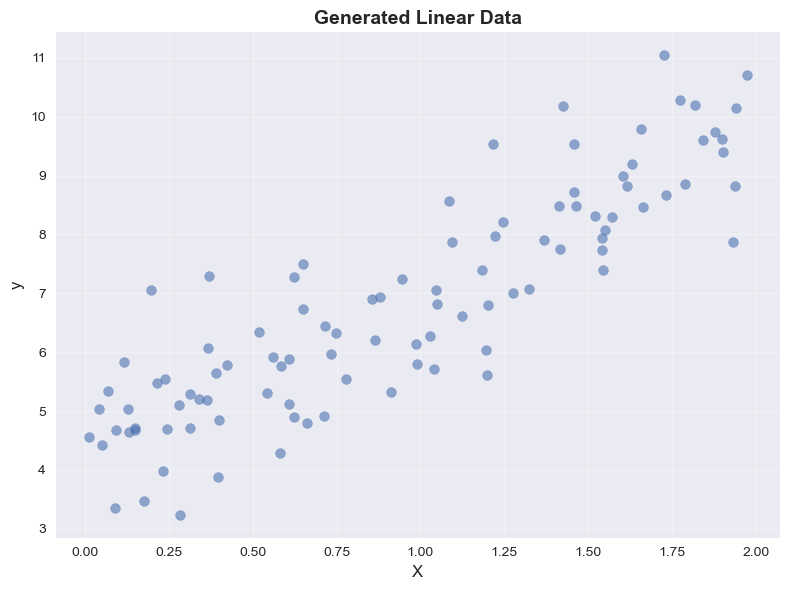

In [2]:
# Generate linear data
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

print("="*80)
print("GENERATED LINEAR DATA")
print("="*80)
print(f"True function: y = 4 + 3x + noise")
print(f"Samples: {m}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, s=50)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Generated Linear Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Cell 2: Normal Equation

NORMAL EQUATION
Optimal parameters:
  θ₀ (intercept): 4.215096
  θ₁ (slope):     2.770113

True parameters:
  θ₀ (intercept): 4.0
  θ₁ (slope):     3.0

Predictions:
  X = 0: y = 4.22
  X = 2: y = 9.76


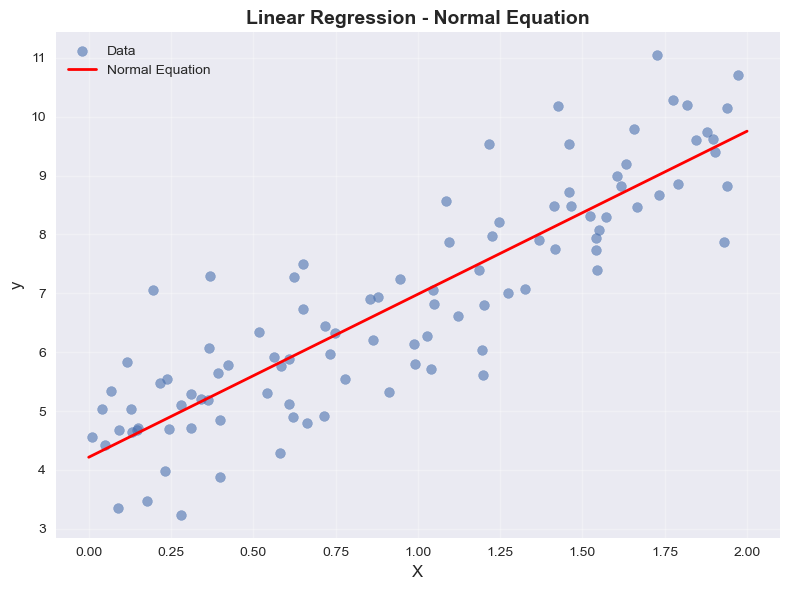

In [3]:
# Add bias term (x0 = 1)
X_b = np.c_[np.ones((m, 1)), X]

# Compute theta using Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("="*80)
print("NORMAL EQUATION")
print("="*80)
print(f"Optimal parameters:")
print(f"  θ₀ (intercept): {theta_best[0][0]:.6f}")
print(f"  θ₁ (slope):     {theta_best[1][0]:.6f}")

# Compare with true values
print(f"\nTrue parameters:")
print(f"  θ₀ (intercept): 4.0")
print(f"  θ₁ (slope):     3.0")

# Make predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

print(f"\nPredictions:")
print(f"  X = 0: y = {y_predict[0][0]:.2f}")
print(f"  X = 2: y = {y_predict[1][0]:.2f}")

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, s=50, label='Data')
plt.plot(X_new, y_predict, 'r-', linewidth=2, label='Normal Equation')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Linear Regression - Normal Equation', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Cell 3: Scikit-Learn Linear Regression

In [4]:
# Using Scikit-Learn
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("="*80)
print("SCIKIT-LEARN LINEAR REGRESSION")
print("="*80)
print(f"Intercept: {lin_reg.intercept_[0]:.6f}")
print(f"Coefficient: {lin_reg.coef_[0][0]:.6f}")

# Predictions
predictions = lin_reg.predict(X_new)
print(f"\nPredictions:")
print(f"  X = 0: y = {predictions[0][0]:.2f}")
print(f"  X = 2: y = {predictions[1][0]:.2f}")

print(f"\n✓ Same result as Normal Equation!")

SCIKIT-LEARN LINEAR REGRESSION
Intercept: 4.215096
Coefficient: 2.770113

Predictions:
  X = 0: y = 4.22
  X = 2: y = 9.76

✓ Same result as Normal Equation!


### Cell 4: Batch Gradient Descent

BATCH GRADIENT DESCENT
Learning rate: 0.1
Iterations: 1000
  Iteration    0: Cost = 11.732041
  Iteration  100: Cost = 0.807408
  Iteration  200: Cost = 0.806585
  Iteration  300: Cost = 0.806585
  Iteration  400: Cost = 0.806585
  Iteration  500: Cost = 0.806585
  Iteration  600: Cost = 0.806585
  Iteration  700: Cost = 0.806585
  Iteration  800: Cost = 0.806585
  Iteration  900: Cost = 0.806585

Final parameters:
  θ₀: 4.215096
  θ₁: 2.770113


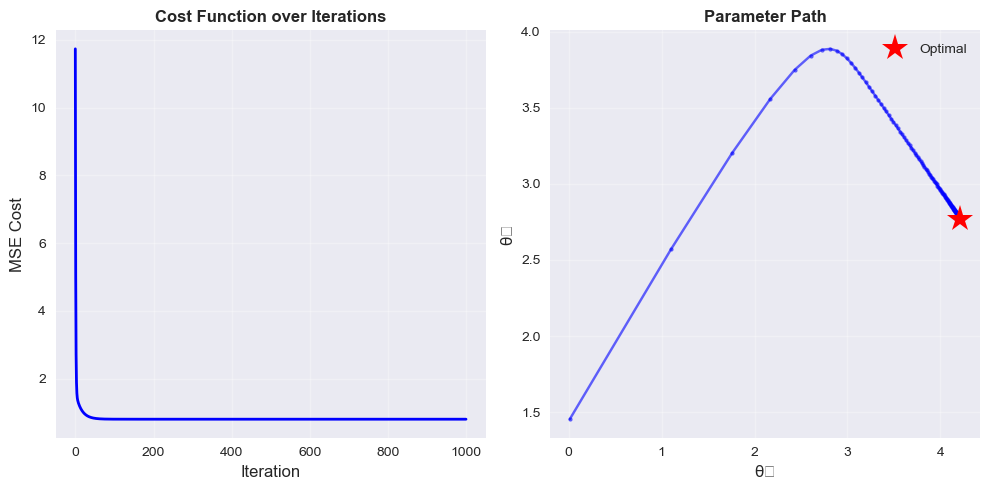

In [5]:
# Hyperparameters
eta = 0.1  # learning rate
n_iterations = 1000

# Random initialization
theta = np.random.randn(2, 1)

# Store history for plotting
theta_history = [theta.copy()]
cost_history = []

print("="*80)
print("BATCH GRADIENT DESCENT")
print("="*80)
print(f"Learning rate: {eta}")
print(f"Iterations: {n_iterations}")

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    # Store history
    theta_history.append(theta.copy())
    cost = np.mean((X_b.dot(theta) - y)**2)
    cost_history.append(cost)
    
    if iteration % 100 == 0:
        print(f"  Iteration {iteration:>4}: Cost = {cost:.6f}")

print(f"\nFinal parameters:")
print(f"  θ₀: {theta[0][0]:.6f}")
print(f"  θ₁: {theta[1][0]:.6f}")

# Plot cost history
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(cost_history, 'b-', linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('MSE Cost', fontsize=12)
plt.title('Cost Function over Iterations', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot parameter path
plt.subplot(1, 2, 2)
theta_history = np.array(theta_history)
plt.plot(theta_history[:, 0], theta_history[:, 1], 'b-o', markersize=3, alpha=0.6)
plt.plot(theta_best[0], theta_best[1], 'r*', markersize=20, label='Optimal')
plt.xlabel('θ₀', fontsize=12)
plt.ylabel('θ₁', fontsize=12)
plt.title('Parameter Path', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Cell 5: Learning Rate Comparison

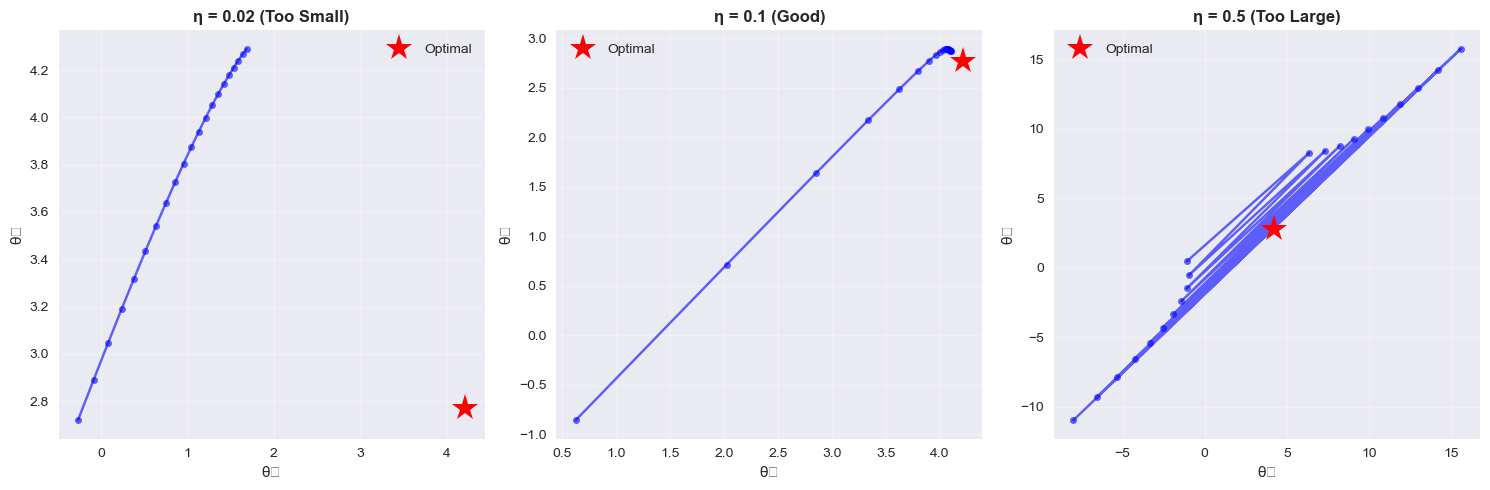

💡 Observations:
  • Too small η: Slow convergence
  • Good η: Fast, smooth convergence
  • Too large η: Divergence, overshooting


In [6]:
# Test different learning rates
learning_rates = [0.02, 0.1, 0.5]
n_iterations = 20

plt.figure(figsize=(15, 5))

for idx, eta in enumerate(learning_rates, 1):
    theta = np.random.randn(2, 1)
    theta_path = [theta.copy()]
    
    for _ in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        theta_path.append(theta.copy())
    
    theta_path = np.array(theta_path)
    
    plt.subplot(1, 3, idx)
    plt.plot(theta_path[:, 0], theta_path[:, 1], 'b-o', markersize=5, alpha=0.6)
    plt.plot(theta_best[0], theta_best[1], 'r*', markersize=20, label='Optimal')
    plt.xlabel('θ₀', fontsize=11)
    plt.ylabel('θ₁', fontsize=11)
    
    if eta == 0.02:
        title = f'η = {eta} (Too Small)'
    elif eta == 0.1:
        title = f'η = {eta} (Good)'
    else:
        title = f'η = {eta} (Too Large)'
    
    plt.title(title, fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Observations:")
print("  • Too small η: Slow convergence")
print("  • Good η: Fast, smooth convergence")
print("  • Too large η: Divergence, overshooting")

### Cell 6: Stochastic Gradient Descent

STOCHASTIC GRADIENT DESCENT
Epochs: 50
Learning schedule: η(t) = 5 / (t + 50)
  Epoch  0: Cost = 0.847093
  Epoch 10: Cost = 0.825450
  Epoch 20: Cost = 0.810184
  Epoch 30: Cost = 0.806959
  Epoch 40: Cost = 0.807303

Final parameters:
  θ₀: 4.179115
  θ₁: 2.726304


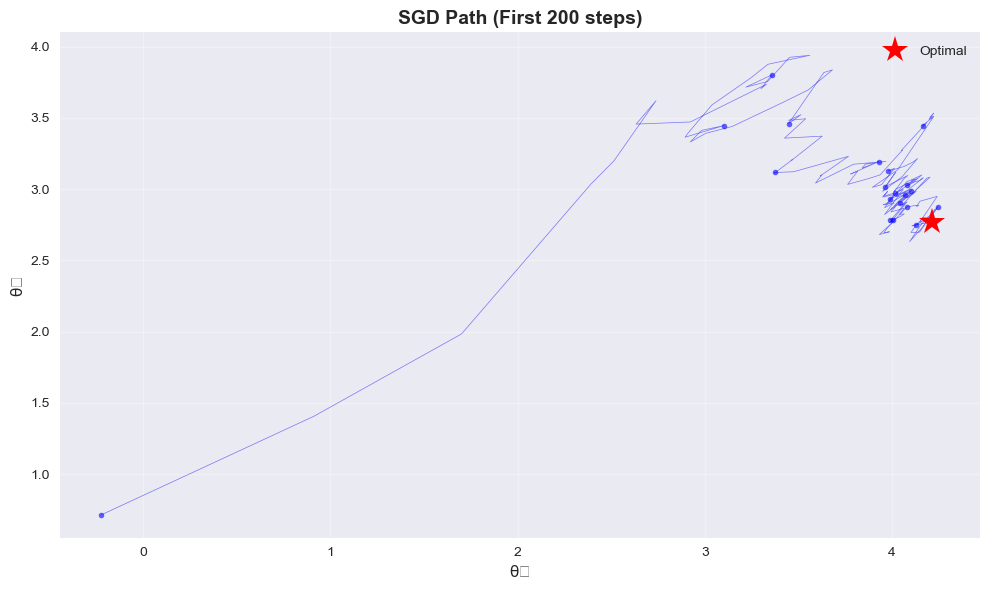


💡 SGD path is erratic but reaches vicinity of optimum


In [7]:
# SGD with learning schedule
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

# Random initialization
theta = np.random.randn(2, 1)
theta_path_sgd = [theta.copy()]

print("="*80)
print("STOCHASTIC GRADIENT DESCENT")
print("="*80)
print(f"Epochs: {n_epochs}")
print(f"Learning schedule: η(t) = {t0} / (t + {t1})")

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta.copy())
    
    if epoch % 10 == 0:
        cost = np.mean((X_b.dot(theta) - y)**2)
        print(f"  Epoch {epoch:>2}: Cost = {cost:.6f}")

print(f"\nFinal parameters:")
print(f"  θ₀: {theta[0][0]:.6f}")
print(f"  θ₁: {theta[1][0]:.6f}")

# Visualize SGD path (first 200 steps)
theta_path_sgd = np.array(theta_path_sgd)

plt.figure(figsize=(10, 6))
plt.plot(theta_path_sgd[:200, 0], theta_path_sgd[:200, 1], 'b-', linewidth=0.5, alpha=0.5)
plt.plot(theta_path_sgd[:200:10, 0], theta_path_sgd[:200:10, 1], 'bo', markersize=4, alpha=0.6)
plt.plot(theta_best[0], theta_best[1], 'r*', markersize=20, label='Optimal')
plt.xlabel('θ₀', fontsize=12)
plt.ylabel('θ₁', fontsize=12)
plt.title('SGD Path (First 200 steps)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 SGD path is erratic but reaches vicinity of optimum")

### Cell 7: SGD with Scikit-Learn

In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, 
                       eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

print("="*80)
print("SCIKIT-LEARN SGD REGRESSOR")
print("="*80)
print(f"Intercept: {sgd_reg.intercept_[0]:.6f}")
print(f"Coefficient: {sgd_reg.coef_[0]:.6f}")

# Predictions
predictions_sgd = sgd_reg.predict(X_new)
print(f"\nPredictions:")
print(f"  X = 0: y = {predictions_sgd[0]:.2f}")
print(f"  X = 2: y = {predictions_sgd[1]:.2f}")

SCIKIT-LEARN SGD REGRESSOR
Intercept: 4.243653
Coefficient: 2.825088

Predictions:
  X = 0: y = 4.24
  X = 2: y = 9.89


### Cell 8: Polynomial Regression

POLYNOMIAL REGRESSION
True function: y = 0.5x² + x + 2 + noise


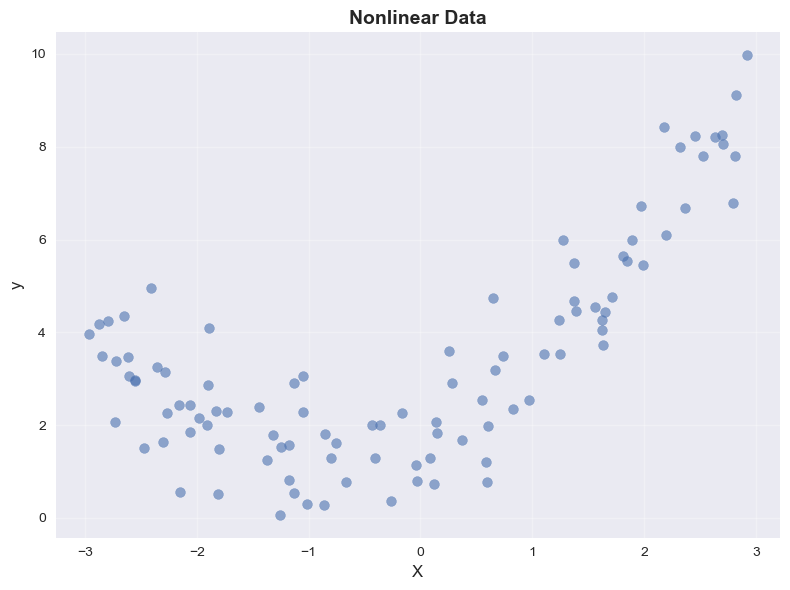


Original feature: [-0.75275929]
Transformed features: [-0.75275929  0.56664654]
  → Added x² = 0.5666

Model parameters:
  Intercept: 1.7813
  Coefficients: [0.93366893 0.56456263]

Estimated: y = 1.78 + 0.93x + 0.56x²
True:      y = 2.00 + 1.00x + 0.50x²


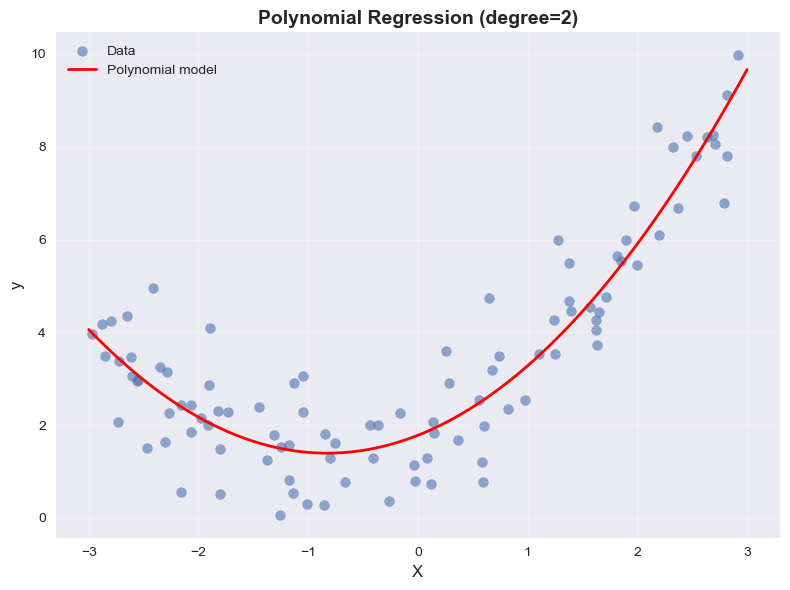

In [9]:
# Generate nonlinear data
np.random.seed(42)
m = 100
X_poly = 6 * np.random.rand(m, 1) - 3
y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.randn(m, 1)

print("="*80)
print("POLYNOMIAL REGRESSION")
print("="*80)
print(f"True function: y = 0.5x² + x + 2 + noise")

# Visualize data
plt.figure(figsize=(8, 6))
plt.scatter(X_poly, y_poly, alpha=0.6, s=50)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Nonlinear Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Transform features (add x²)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_transformed = poly_features.fit_transform(X_poly)

print(f"\nOriginal feature: {X_poly[0]}")
print(f"Transformed features: {X_poly_transformed[0]}")
print(f"  → Added x² = {X_poly_transformed[0][1]:.4f}")

# Fit linear model on transformed features
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly_transformed, y_poly)

print(f"\nModel parameters:")
print(f"  Intercept: {lin_reg_poly.intercept_[0]:.4f}")
print(f"  Coefficients: {lin_reg_poly.coef_[0]}")
print(f"\nEstimated: y = {lin_reg_poly.intercept_[0]:.2f} + {lin_reg_poly.coef_[0][0]:.2f}x + {lin_reg_poly.coef_[0][1]:.2f}x²")
print(f"True:      y = 2.00 + 1.00x + 0.50x²")

# Visualize
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_transformed = poly_features.transform(X_plot)
y_plot = lin_reg_poly.predict(X_plot_transformed)

plt.figure(figsize=(8, 6))
plt.scatter(X_poly, y_poly, alpha=0.6, s=50, label='Data')
plt.plot(X_plot, y_plot, 'r-', linewidth=2, label='Polynomial model')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Polynomial Regression (degree=2)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Cell 9: Overfitting with High-Degree Polynomial

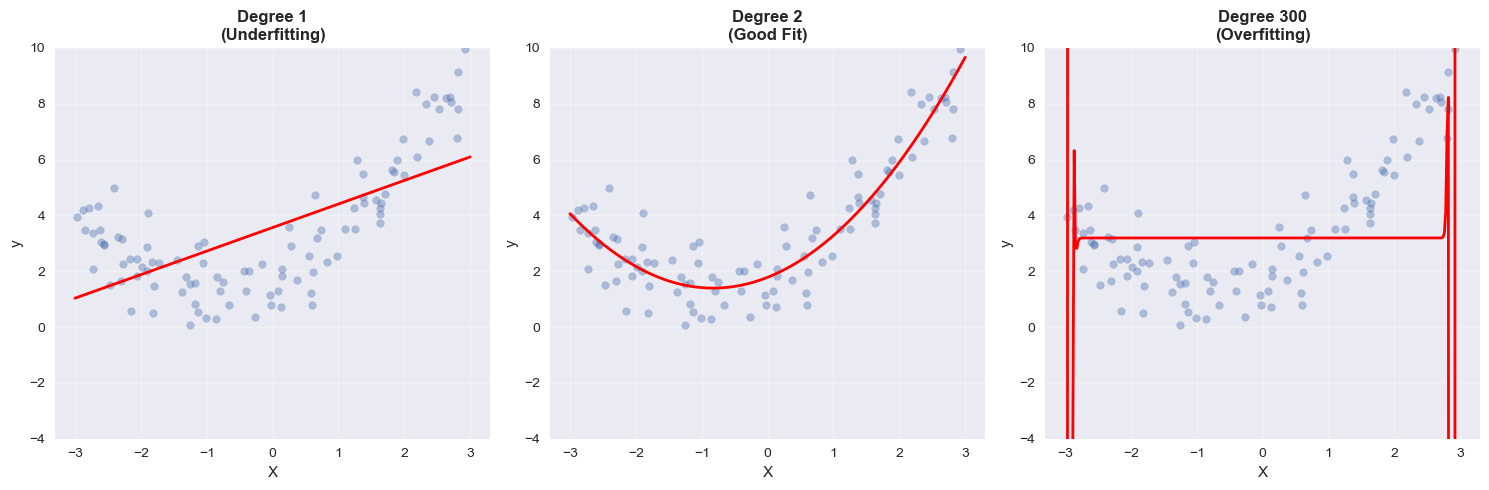

💡 Observations:
  • Degree 1: Underfitting (too simple)
  • Degree 2: Good fit (matches true function)
  • Degree 300: Overfitting (wiggles too much)


In [10]:
# Compare different polynomial degrees
degrees = [1, 2, 300]
plt.figure(figsize=(15, 5))

for idx, degree in enumerate(degrees, 1):
    plt.subplot(1, 3, idx)
    
    # Transform and fit
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_transformed = poly_features.fit_transform(X_poly)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_transformed, y_poly)
    
    # Plot
    X_plot = np.linspace(-3, 3, 300).reshape(-1, 1)
    X_plot_transformed = poly_features.transform(X_plot)
    y_plot = lin_reg.predict(X_plot_transformed)
    
    plt.scatter(X_poly, y_poly, alpha=0.4, s=30)
    plt.plot(X_plot, y_plot, 'r-', linewidth=2)
    plt.xlabel('X', fontsize=11)
    plt.ylabel('y', fontsize=11)
    
    if degree == 1:
        title = f'Degree {degree}\n(Underfitting)'
    elif degree == 2:
        title = f'Degree {degree}\n(Good Fit)'
    else:
        title = f'Degree {degree}\n(Overfitting)'
    
    plt.title(title, fontsize=12, fontweight='bold')
    plt.ylim([-4, 10])
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Observations:")
print("  • Degree 1: Underfitting (too simple)")
print("  • Degree 2: Good fit (matches true function)")
print("  • Degree 300: Overfitting (wiggles too much)")

### Cell 10: Learning Curves

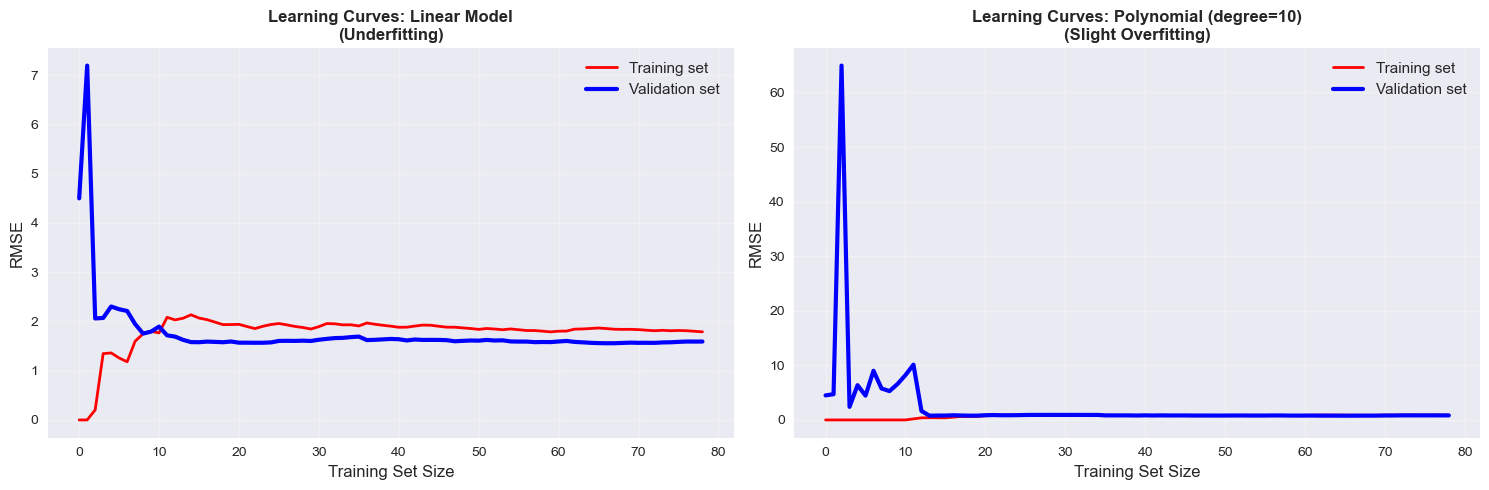

💡 Learning Curves Analysis:

Underfitting (left):
  • Both curves plateau
  • Small gap, but both errors high
  • Need more complex model

Overfitting (right):
  • Large gap between curves
  • Low training error, high validation error
  • Need more data or regularization


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set", markersize=8)
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.xlabel('Training Set Size', fontsize=12)
    plt.ylabel('RMSE', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)

# Linear model (underfitting)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly, y_poly)
plt.title('Learning Curves: Linear Model\n(Underfitting)', fontsize=12, fontweight='bold')

# Polynomial model (good fit)
plt.subplot(1, 2, 2)
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X_poly, y_poly)
plt.title('Learning Curves: Polynomial (degree=10)\n(Slight Overfitting)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("💡 Learning Curves Analysis:")
print("\nUnderfitting (left):")
print("  • Both curves plateau")
print("  • Small gap, but both errors high")
print("  • Need more complex model")
print("\nOverfitting (right):")
print("  • Large gap between curves")
print("  • Low training error, high validation error")
print("  • Need more data or regularization")

### Cell 11: Ridge Regression

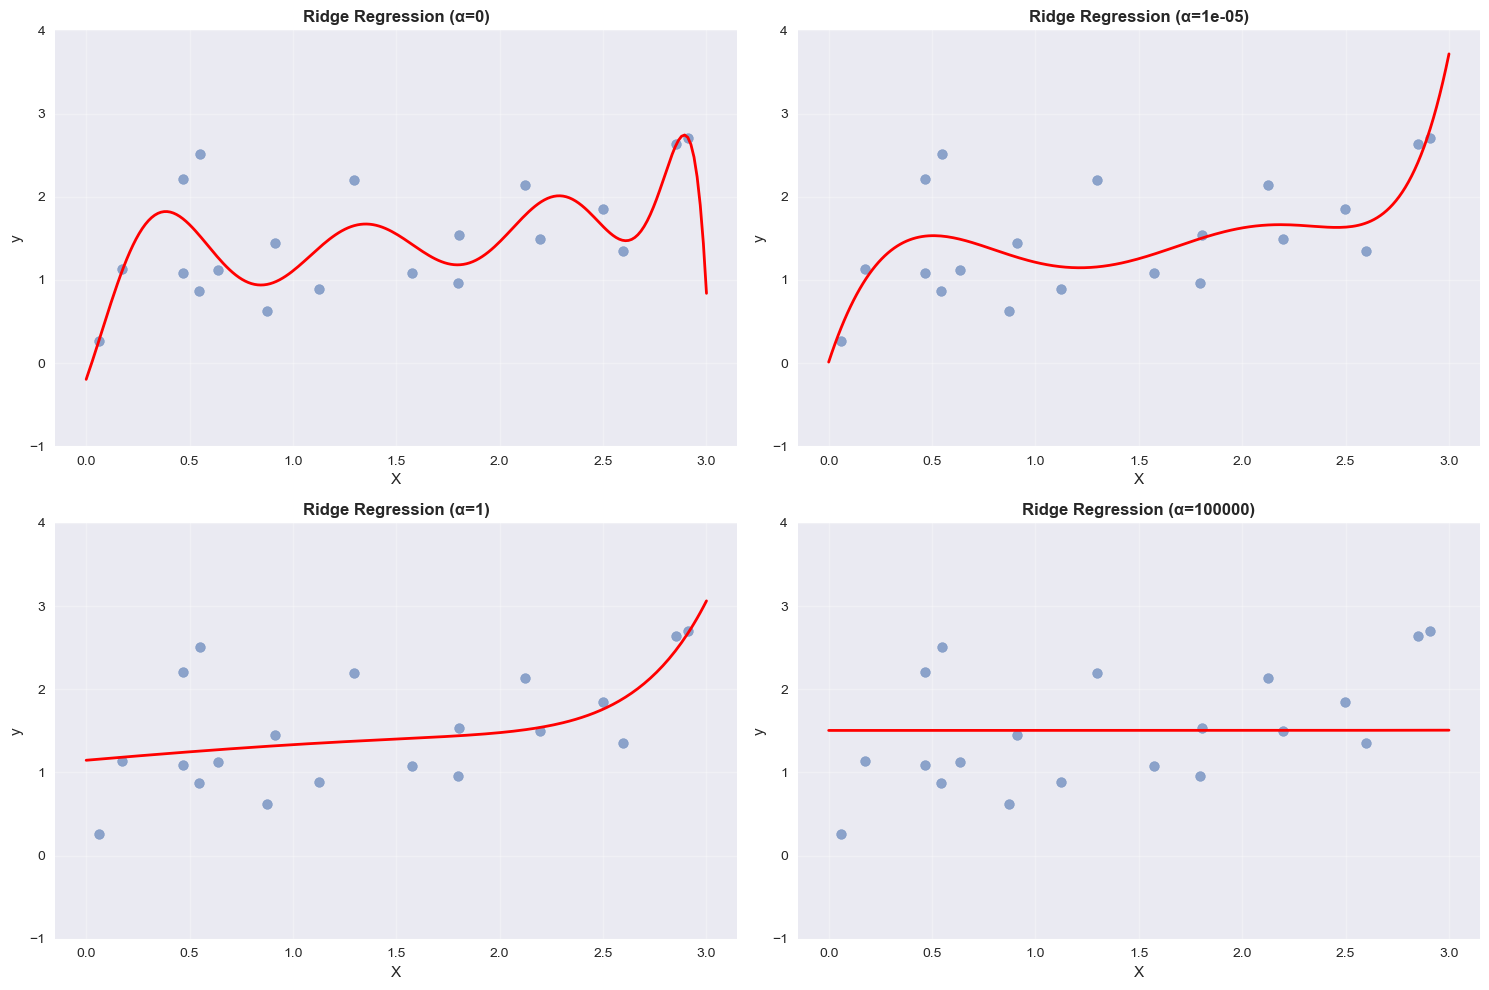

RIDGE REGRESSION
💡 Effect of α (regularization strength):
  • α = 0:        No regularization (may overfit)
  • α = 0.00001:  Light regularization
  • α = 1:        Moderate regularization
  • α = 100000:   Strong regularization (underfits)


In [12]:
from sklearn.linear_model import Ridge

# Generate data prone to overfitting
np.random.seed(42)
m = 20
X_ridge = 3 * np.random.rand(m, 1)
y_ridge = 1 + 0.5 * X_ridge + np.random.randn(m, 1) / 1.5

# Polynomial features
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_ridge_poly = poly_features.fit_transform(X_ridge)

# Standard scaling
scaler = StandardScaler()
X_ridge_poly_scaled = scaler.fit_transform(X_ridge_poly)

# Compare different alpha values
alphas = [0, 10**-5, 1, 10**5]
plt.figure(figsize=(15, 10))

for idx, alpha in enumerate(alphas, 1):
    plt.subplot(2, 2, idx)
    
    # Fit model
    ridge_reg = Ridge(alpha=alpha, solver="cholesky", random_state=42)
    ridge_reg.fit(X_ridge_poly_scaled, y_ridge)
    
    # Plot
    X_plot = np.linspace(0, 3, 200).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    X_plot_poly_scaled = scaler.transform(X_plot_poly)
    y_plot = ridge_reg.predict(X_plot_poly_scaled)
    
    plt.scatter(X_ridge, y_ridge, s=50, alpha=0.6)
    plt.plot(X_plot, y_plot, 'r-', linewidth=2)
    plt.xlabel('X', fontsize=11)
    plt.ylabel('y', fontsize=11)
    plt.title(f'Ridge Regression (α={alpha})', fontsize=12, fontweight='bold')
    plt.ylim([-1, 4])
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*80)
print("RIDGE REGRESSION")
print("="*80)
print("💡 Effect of α (regularization strength):")
print("  • α = 0:        No regularization (may overfit)")
print("  • α = 0.00001:  Light regularization")
print("  • α = 1:        Moderate regularization")
print("  • α = 100000:   Strong regularization (underfits)")

### Cell 12: Lasso Regression

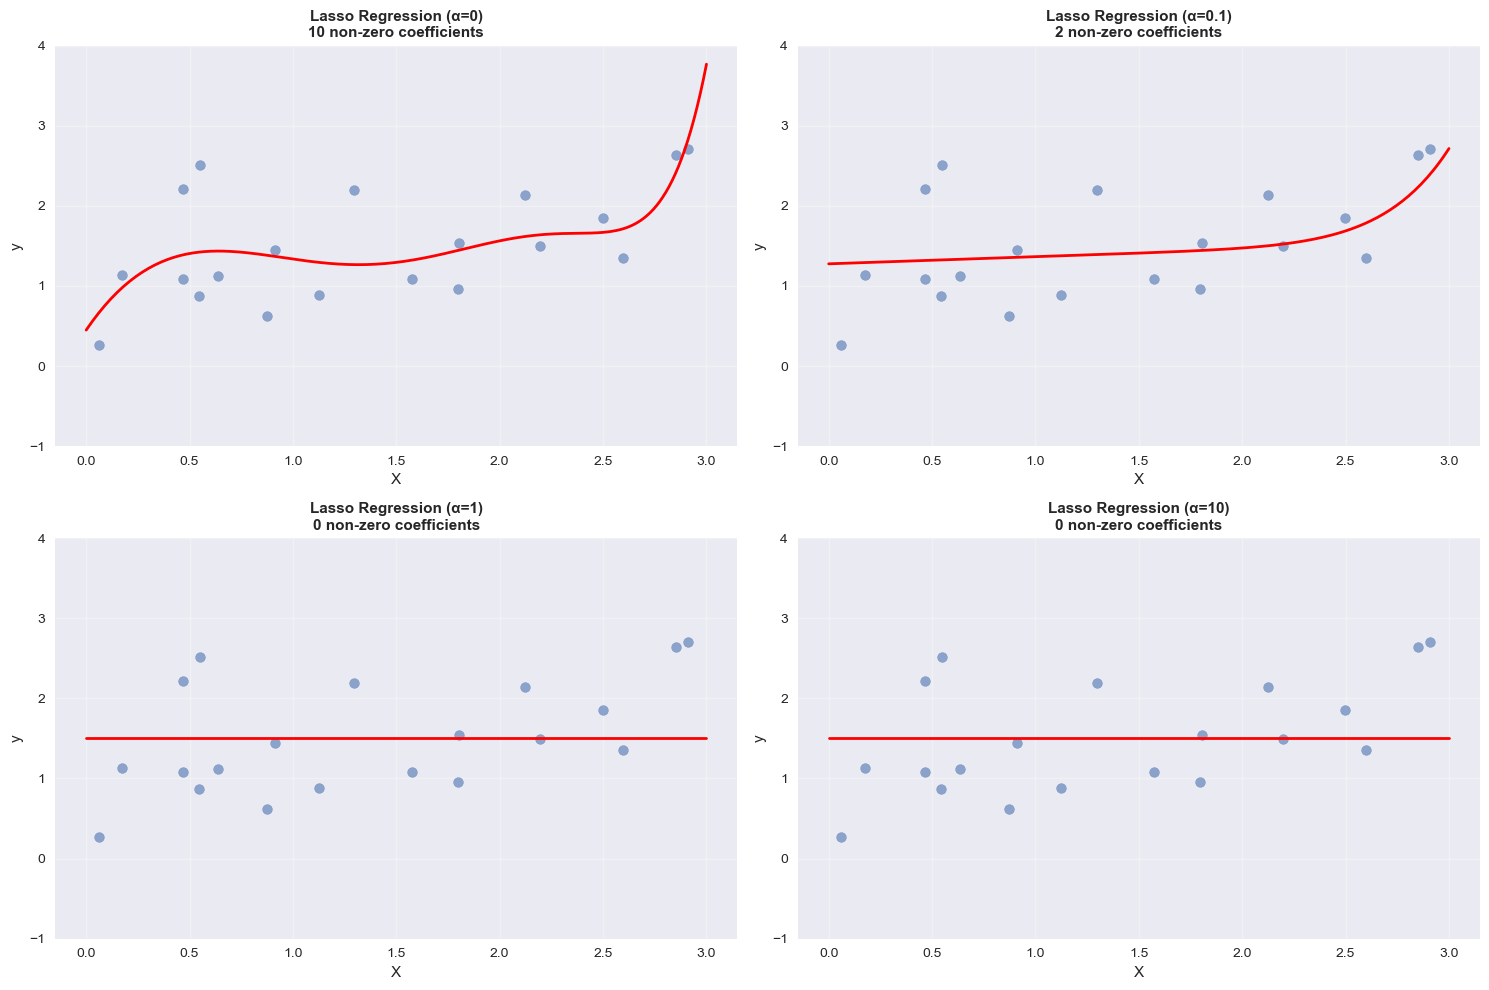

LASSO REGRESSION
💡 Lasso eliminates least important features:
  • α = 0:    All features used
  • α = 0.1:  Some features eliminated
  • α = 1:    More features eliminated
  • α = 10:   Most features eliminated (sparse model)


In [13]:
from sklearn.linear_model import Lasso

# Lasso with different alpha values
alphas_lasso = [0, 0.1, 1, 10]
plt.figure(figsize=(15, 10))

for idx, alpha in enumerate(alphas_lasso, 1):
    plt.subplot(2, 2, idx)
    
    # Fit model
    lasso_reg = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_reg.fit(X_ridge_poly_scaled, y_ridge)
    
    # Plot
    X_plot = np.linspace(0, 3, 200).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    X_plot_poly_scaled = scaler.transform(X_plot_poly)
    y_plot = lasso_reg.predict(X_plot_poly_scaled)
    
    plt.scatter(X_ridge, y_ridge, s=50, alpha=0.6)
    plt.plot(X_plot, y_plot, 'r-', linewidth=2)
    plt.xlabel('X', fontsize=11)
    plt.ylabel('y', fontsize=11)
    
    # Count non-zero coefficients
    n_nonzero = np.sum(lasso_reg.coef_ != 0)
    plt.title(f'Lasso Regression (α={alpha})\n{n_nonzero} non-zero coefficients', 
             fontsize=11, fontweight='bold')
    plt.ylim([-1, 4])
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*80)
print("LASSO REGRESSION")
print("="*80)
print("💡 Lasso eliminates least important features:")
print("  • α = 0:    All features used")
print("  • α = 0.1:  Some features eliminated")
print("  • α = 1:    More features eliminated")
print("  • α = 10:   Most features eliminated (sparse model)")

### Cell 13: Ridge vs Lasso Comparison

In [14]:
# Create simple 2D example for visualization
np.random.seed(42)
m = 50
X_simple = np.random.rand(m, 2)
y_simple = 3 + 2*X_simple[:, 0] + 0.1*X_simple[:, 1] + np.random.randn(m)

# Ridge
ridge = Ridge(alpha=1, random_state=42)
ridge.fit(X_simple, y_simple)

# Lasso
lasso = Lasso(alpha=0.1, random_state=42, max_iter=10000)
lasso.fit(X_simple, y_simple)

print("="*80)
print("RIDGE vs LASSO COMPARISON")
print("="*80)
print(f"\nTrue coefficients:  [2.0, 0.1]")
print(f"Ridge coefficients: [{ridge.coef_[0]:.4f}, {ridge.coef_[1]:.4f}]")
print(f"Lasso coefficients: [{lasso.coef_[0]:.4f}, {lasso.coef_[1]:.4f}]")

print(f"\n💡 Observations:")
print(f"  • Ridge: Shrinks both coefficients")
print(f"  • Lasso: Shrinks small coefficient to {lasso.coef_[1]:.4f} (nearly 0)")
print(f"  • Lasso performs automatic feature selection")

RIDGE vs LASSO COMPARISON

True coefficients:  [2.0, 0.1]
Ridge coefficients: [1.8481, -0.5757]
Lasso coefficients: [1.1867, -0.0000]

💡 Observations:
  • Ridge: Shrinks both coefficients
  • Lasso: Shrinks small coefficient to -0.0000 (nearly 0)
  • Lasso performs automatic feature selection


### Cell 14: Elastic Net

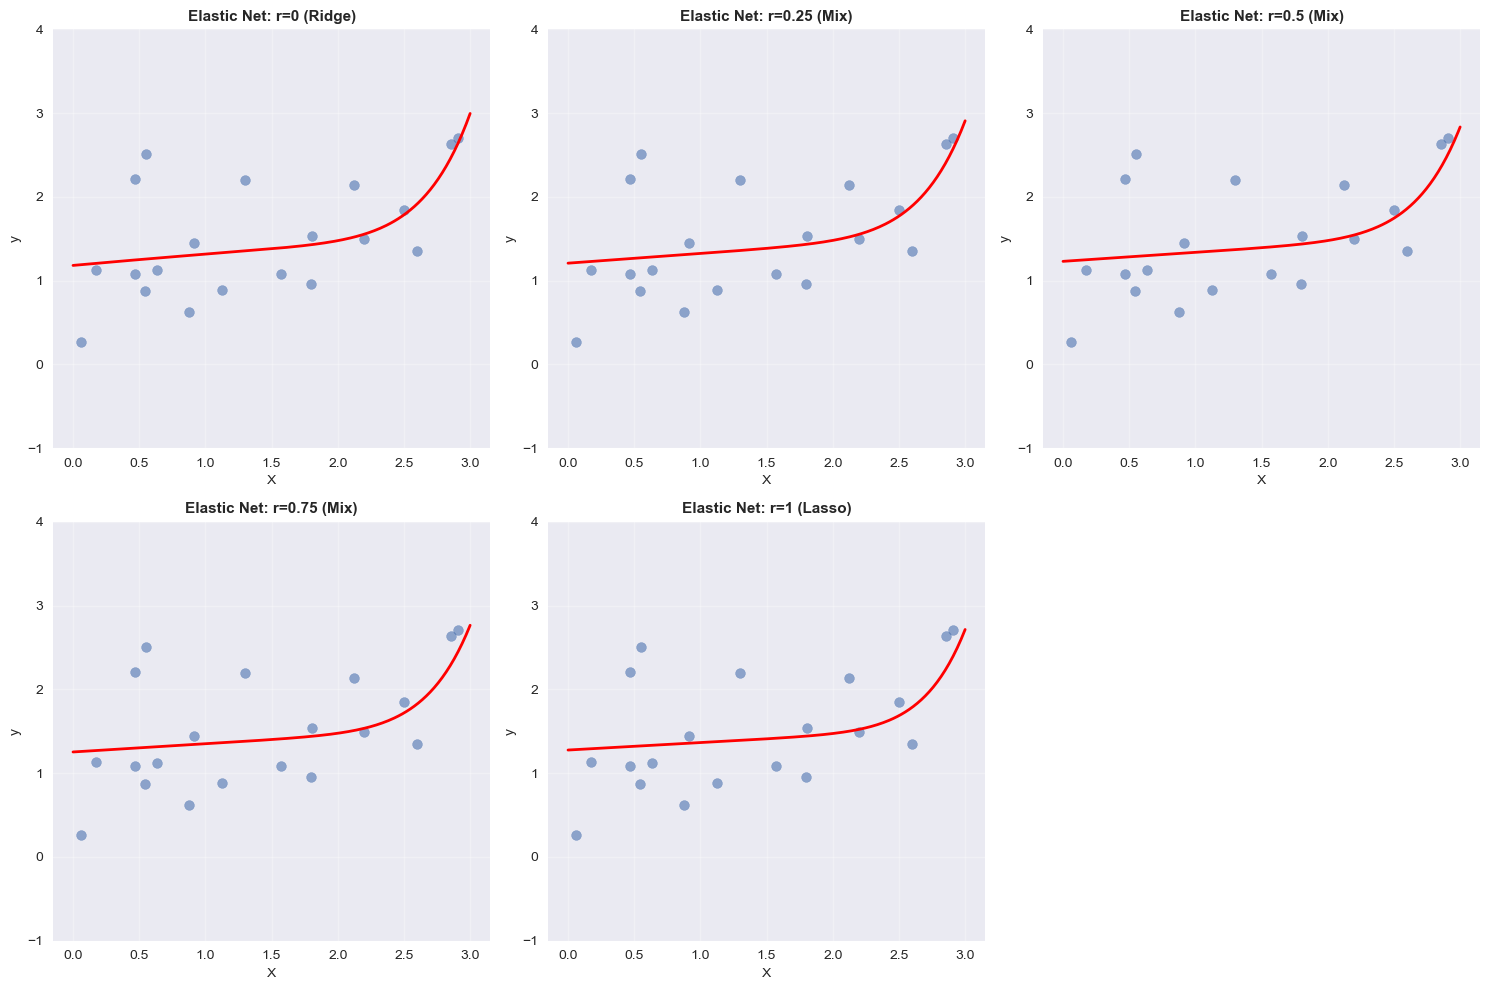

ELASTIC NET
💡 l1_ratio controls the mix:
  • r = 0:   Pure Ridge (ℓ₂ penalty)
  • r = 0.5: 50% Ridge + 50% Lasso
  • r = 1:   Pure Lasso (ℓ₁ penalty)


In [15]:
from sklearn.linear_model import ElasticNet

# Elastic Net with different l1_ratio
l1_ratios = [0, 0.25, 0.5, 0.75, 1]
plt.figure(figsize=(15, 10))

for idx, l1_ratio in enumerate(l1_ratios, 1):
    plt.subplot(2, 3, idx)
    
    # Fit model
    elastic_net = ElasticNet(alpha=0.1, l1_ratio=l1_ratio, random_state=42, max_iter=10000)
    elastic_net.fit(X_ridge_poly_scaled, y_ridge)
    
    # Plot
    X_plot = np.linspace(0, 3, 200).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    X_plot_poly_scaled = scaler.transform(X_plot_poly)
    y_plot = elastic_net.predict(X_plot_poly_scaled)
    
    plt.scatter(X_ridge, y_ridge, s=50, alpha=0.6)
    plt.plot(X_plot, y_plot, 'r-', linewidth=2)
    plt.xlabel('X', fontsize=10)
    plt.ylabel('y', fontsize=10)
    
    if l1_ratio == 0:
        title = f'r={l1_ratio} (Ridge)'
    elif l1_ratio == 1:
        title = f'r={l1_ratio} (Lasso)'
    else:
        title = f'r={l1_ratio} (Mix)'
    
    plt.title(f'Elastic Net: {title}', fontsize=11, fontweight='bold')
    plt.ylim([-1, 4])
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*80)
print("ELASTIC NET")
print("="*80)
print("💡 l1_ratio controls the mix:")
print("  • r = 0:   Pure Ridge (ℓ₂ penalty)")
print("  • r = 0.5: 50% Ridge + 50% Lasso")
print("  • r = 1:   Pure Lasso (ℓ₁ penalty)")

### Cell 15: Early Stopping

EARLY STOPPING
Training with monitoring validation error...

Epoch   0: Train Error = 17.0839, Val Error = 19.2308
Epoch 100: Train Error = 95060191205343008.0000, Val Error = 19068606914222336.0000
Epoch 200: Train Error = 18883096591175193198592.0000, Val Error = 3747358208181308227584.0000
Epoch 300: Train Error = 18815096492299311382528.0000, Val Error = 3738222911209052569600.0000
Epoch 400: Train Error = 18777119833904585375744.0000, Val Error = 3734009179030941073408.0000
Epoch 500: Train Error = 18751393137740769918976.0000, Val Error = 3731394520075014766592.0000
Epoch 600: Train Error = 18732772981562136330240.0000, Val Error = 3729636963935013306368.0000
Epoch 700: Train Error = 18718517807959886528512.0000, Val Error = 3728383544171811569664.0000
Epoch 800: Train Error = 18707056968081480876032.0000, Val Error = 3727440177486002913280.0000
Epoch 900: Train Error = 18697462034091479138304.0000, Val Error = 3726694901536194035712.0000

Best model at epoch 7 with validation er

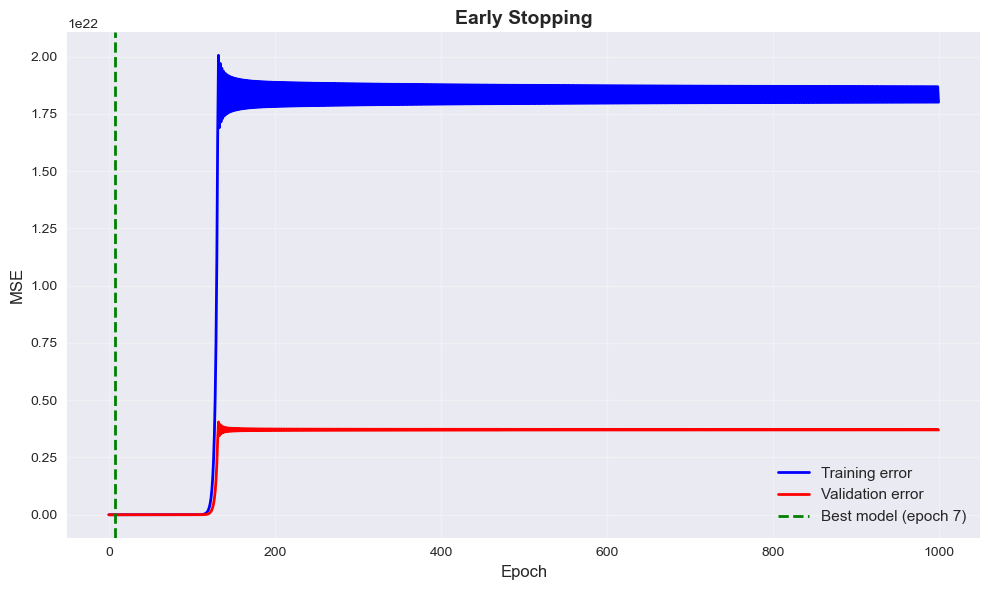


Early Stopping:
  • Stop when validation error stops improving
  • Prevents overfitting
  • 'Beautiful free lunch' - Geoffrey Hinton


In [18]:
# Prepare polynomial data
np.random.seed(42)
m = 100
X_early = 6 * np.random.rand(m, 1) - 3
y_early = 0.5 * X_early**2 + X_early + 2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X_early, y_early, test_size=0.2, random_state=42)

# Prepare features
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# SGD with early stopping (CORRECTED)
sgd_reg = SGDRegressor(
    max_iter=1, 
    tol=None,  # <-- FIXED: None instead of -np.infty
    warm_start=True,
    penalty=None, 
    learning_rate="constant", 
    eta0=0.0005,
    random_state=42
)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

train_errors, val_errors = [], []

print("="*80)
print("EARLY STOPPING")
print("="*80)
print("Training with monitoring validation error...\n")

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())  # warm_start memungkinkan lanjut dari sebelumnya
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    train_error = mean_squared_error(y_train, y_train_predict)
    
    train_errors.append(train_error)
    val_errors.append(val_error)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = sgd_reg  # Simpan model terbaik
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch:>3}: Train Error = {train_error:.4f}, Val Error = {val_error:.4f}")

print(f"\nBest model at epoch {best_epoch} with validation error {minimum_val_error:.4f}")

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_errors, 'b-', linewidth=2, label='Training error')
plt.plot(val_errors, 'r-', linewidth=2, label='Validation error')
plt.axvline(x=best_epoch, color='g', linestyle='--', linewidth=2, label=f'Best model (epoch {best_epoch})')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Early Stopping', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nEarly Stopping:")
print("  • Stop when validation error stops improving")
print("  • Prevents overfitting")
print("  • 'Beautiful free lunch' - Geoffrey Hinton")

### Cell 16: Logistic Regression - Iris Dataset

LOGISTIC REGRESSION - IRIS DATASET
Dataset keys: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Binary classification: Iris Virginica (1) vs Others (0)
Samples: 150
Class distribution: [100  50]

✓ Model trained!
Intercept: -7.1934
Coefficient: 4.3325


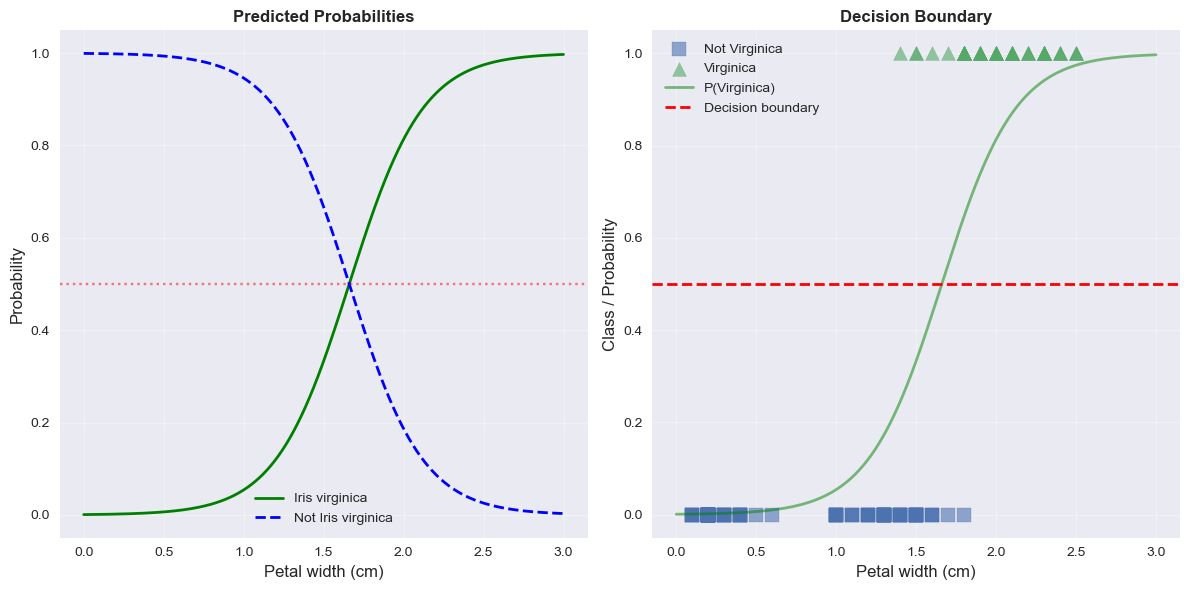


PREDICTIONS
Width 1.5 cm: Class 0 (P(virginica)=33.30%)
Width 1.7 cm: Class 1 (P(virginica)=54.29%)
Width 2.0 cm: Class 1 (P(virginica)=81.33%)


In [19]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Load Iris dataset
iris = datasets.load_iris()
print("="*80)
print("LOGISTIC REGRESSION - IRIS DATASET")
print("="*80)
print(f"Dataset keys: {list(iris.keys())}")
print(f"Target names: {iris.target_names}")
print(f"Feature names: {iris.feature_names}")

# Use only petal width to detect Iris Virginica
X_iris = iris["data"][:, 3:]  # petal width
y_iris = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

print(f"\nBinary classification: Iris Virginica (1) vs Others (0)")
print(f"Samples: {len(X_iris)}")
print(f"Class distribution: {np.bincount(y_iris)}")

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_iris, y_iris)

print(f"\n✓ Model trained!")
print(f"Intercept: {log_reg.intercept_[0]:.4f}")
print(f"Coefficient: {log_reg.coef_[0][0]:.4f}")

# Estimated probabilities
X_new_iris = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new_iris)

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(X_new_iris, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new_iris, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.axhline(y=0.5, color='r', linestyle=':', alpha=0.5)
plt.xlabel('Petal width (cm)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Predicted Probabilities', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_iris[y_iris==0], y_iris[y_iris==0], alpha=0.6, s=100, marker='s', label='Not Virginica')
plt.scatter(X_iris[y_iris==1], y_iris[y_iris==1], alpha=0.6, s=100, marker='^', label='Virginica')
plt.plot(X_new_iris, y_proba[:, 1], "g-", linewidth=2, alpha=0.5, label='P(Virginica)')
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=2, label='Decision boundary')
plt.xlabel('Petal width (cm)', fontsize=12)
plt.ylabel('Class / Probability', fontsize=12)
plt.title('Decision Boundary', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Make predictions
test_widths = [[1.5], [1.7], [2.0]]
predictions = log_reg.predict(test_widths)
probabilities = log_reg.predict_proba(test_widths)

print("\n" + "="*80)
print("PREDICTIONS")
print("="*80)
for width, pred, prob in zip(test_widths, predictions, probabilities):
    print(f"Width {width[0]:.1f} cm: Class {pred} (P(virginica)={prob[1]:.2%})")

### Cell 17: Logistic Regression - 2D Decision Boundary

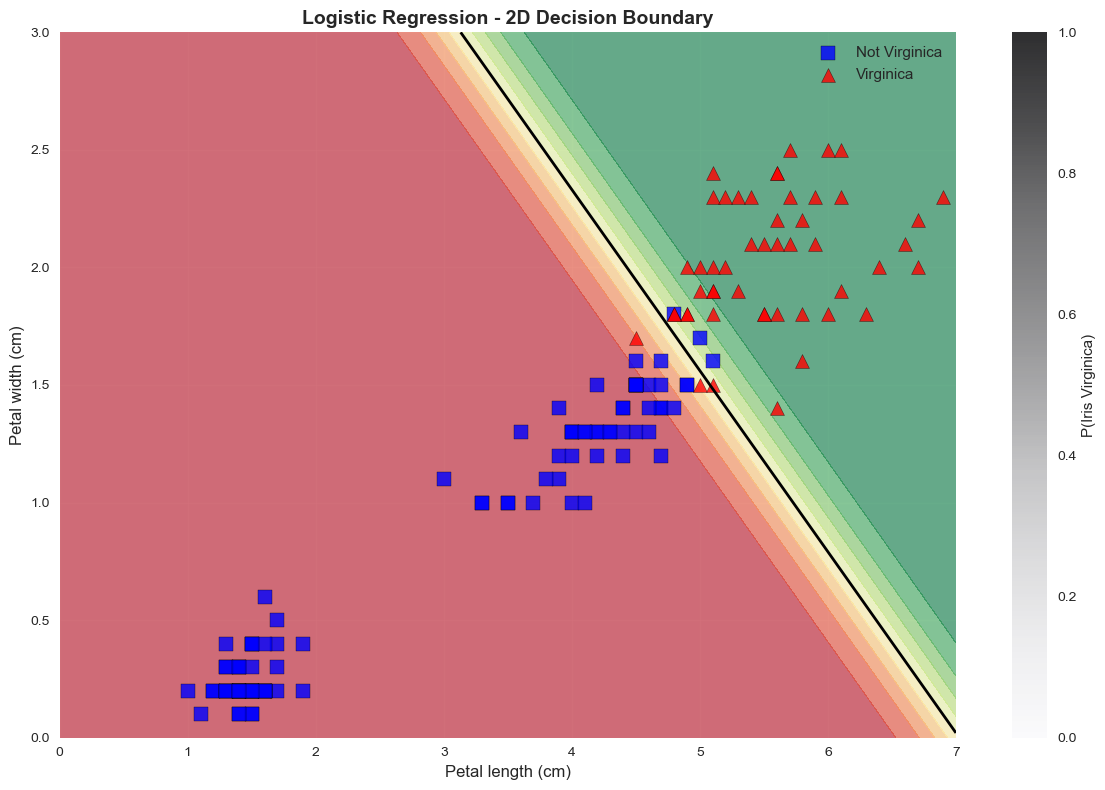

2D LOGISTIC REGRESSION
Model coefficients:
  θ₀ (intercept): -31.0649
  θ₁ (petal length): 4.4213
  θ₂ (petal width): 5.7397

💡 Decision boundary is linear in 2D space


In [20]:
# Use petal width and length
X_iris_2d = iris["data"][:, 2:]  # petal length and width
y_iris_2d = (iris["target"] == 2).astype(int)

# Train model
log_reg_2d = LogisticRegression(random_state=42, C=10)
log_reg_2d.fit(X_iris_2d, y_iris_2d)

# Create mesh for decision boundary
x0, x1 = np.meshgrid(
    np.linspace(0, 7, 500).reshape(-1, 1),
    np.linspace(0, 3, 200).reshape(-1, 1),
)
X_new_2d = np.c_[x0.ravel(), x1.ravel()]
y_proba_2d = log_reg_2d.predict_proba(X_new_2d)
y_predict = log_reg_2d.predict(X_new_2d)

zz = y_proba_2d[:, 1].reshape(x0.shape)
decision_boundary = (y_proba_2d[:, 1] >= 0.5).reshape(x0.shape)

# Plot
plt.figure(figsize=(12, 8))

# Contour plot
plt.contourf(x0, x1, zz, levels=np.linspace(0, 1, 11), cmap='RdYlGn', alpha=0.6)
plt.contour(x0, x1, zz, levels=[0.5], colors='black', linewidths=2)

# Scatter plot
plt.scatter(X_iris_2d[y_iris_2d==0, 0], X_iris_2d[y_iris_2d==0, 1], 
           s=100, marker='s', c='blue', edgecolors='black', label='Not Virginica', alpha=0.8)
plt.scatter(X_iris_2d[y_iris_2d==1, 0], X_iris_2d[y_iris_2d==1, 1], 
           s=100, marker='^', c='red', edgecolors='black', label='Virginica', alpha=0.8)

plt.xlabel('Petal length (cm)', fontsize=12)
plt.ylabel('Petal width (cm)', fontsize=12)
plt.title('Logistic Regression - 2D Decision Boundary', fontsize=14, fontweight='bold')
plt.colorbar(label='P(Iris Virginica)')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("="*80)
print("2D LOGISTIC REGRESSION")
print("="*80)
print(f"Model coefficients:")
print(f"  θ₀ (intercept): {log_reg_2d.intercept_[0]:.4f}")
print(f"  θ₁ (petal length): {log_reg_2d.coef_[0][0]:.4f}")
print(f"  θ₂ (petal width): {log_reg_2d.coef_[0][1]:.4f}")
print(f"\n💡 Decision boundary is linear in 2D space")

### Cell 18: Softmax Regression - Multiclass

SOFTMAX REGRESSION - MULTICLASS
Classes: ['setosa' 'versicolor' 'virginica']
Model parameters shape: (3, 2)
  → 3 classes × 2 features

Test sample: petal length=5 cm, petal width=2 cm
Prediction: virginica

Probabilities:
  setosa         : 0.0000 (0.00%)
  versicolor     : 0.0574 (5.74%)
  virginica      : 0.9426 (94.26%)


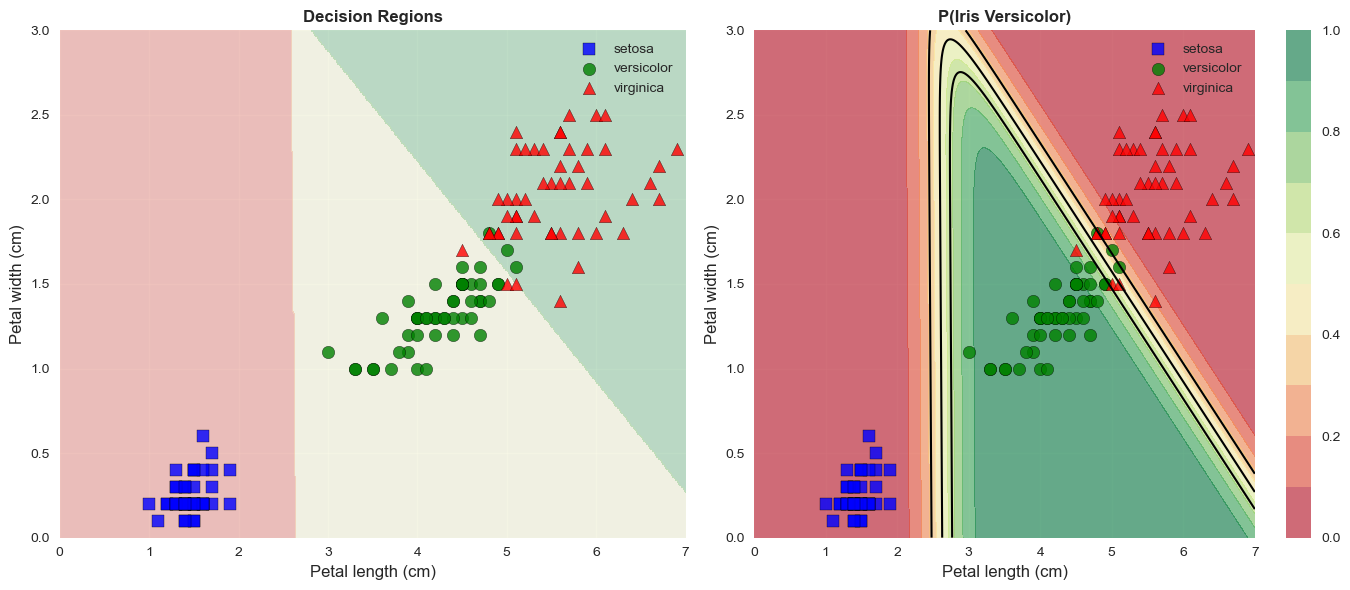


💡 Softmax Regression:
  • Generalizes Logistic Regression to multiple classes
  • One probability per class
  • Probabilities sum to 1
  • Decision boundaries are linear


In [21]:
# Softmax Regression for all 3 iris classes
X_iris_full = iris["data"][:, 2:]  # petal length and width
y_iris_full = iris["target"]

# Train Softmax Regression
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", 
                                 C=10, random_state=42)
softmax_reg.fit(X_iris_full, y_iris_full)

print("="*80)
print("SOFTMAX REGRESSION - MULTICLASS")
print("="*80)
print(f"Classes: {iris.target_names}")
print(f"Model parameters shape: {softmax_reg.coef_.shape}")
print(f"  → 3 classes × 2 features")

# Make prediction
test_sample = [[5, 2]]
prediction = softmax_reg.predict(test_sample)
probabilities = softmax_reg.predict_proba(test_sample)

print(f"\nTest sample: petal length={test_sample[0][0]} cm, petal width={test_sample[0][1]} cm")
print(f"Prediction: {iris.target_names[prediction[0]]}")
print(f"\nProbabilities:")
for i, prob in enumerate(probabilities[0]):
    print(f"  {iris.target_names[i]:15s}: {prob:.4f} ({prob*100:.2f}%)")

# Create mesh for visualization
x0, x1 = np.meshgrid(
    np.linspace(0, 7, 500).reshape(-1, 1),
    np.linspace(0, 3, 200).reshape(-1, 1),
)
X_mesh = np.c_[x0.ravel(), x1.ravel()]
y_proba_mesh = softmax_reg.predict_proba(X_mesh)
y_predict_mesh = softmax_reg.predict(X_mesh).reshape(x0.shape)

# Plot
plt.figure(figsize=(14, 6))

# Left: Decision regions
plt.subplot(1, 2, 1)
plt.contourf(x0, x1, y_predict_mesh, levels=2, cmap='RdYlGn', alpha=0.3)

colors = ['blue', 'green', 'red']
markers = ['s', 'o', '^']
for i, (color, marker) in enumerate(zip(colors, markers)):
    plt.scatter(X_iris_full[y_iris_full==i, 0], X_iris_full[y_iris_full==i, 1],
               s=80, c=color, marker=marker, edgecolors='black', 
               label=iris.target_names[i], alpha=0.8)

plt.xlabel('Petal length (cm)', fontsize=12)
plt.ylabel('Petal width (cm)', fontsize=12)
plt.title('Decision Regions', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Right: Probability contours for Iris Versicolor
plt.subplot(1, 2, 2)
zz = y_proba_mesh[:, 1].reshape(x0.shape)  # Probability of Versicolor
contour = plt.contourf(x0, x1, zz, levels=np.linspace(0, 1, 11), cmap='RdYlGn', alpha=0.6)
plt.contour(x0, x1, zz, levels=[0.33, 0.5, 0.66], colors='black', linewidths=1.5)

for i, (color, marker) in enumerate(zip(colors, markers)):
    plt.scatter(X_iris_full[y_iris_full==i, 0], X_iris_full[y_iris_full==i, 1],
               s=80, c=color, marker=marker, edgecolors='black', 
               label=iris.target_names[i], alpha=0.8)

plt.xlabel('Petal length (cm)', fontsize=12)
plt.ylabel('Petal width (cm)', fontsize=12)
plt.title('P(Iris Versicolor)', fontsize=12, fontweight='bold')
plt.colorbar(contour)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Softmax Regression:")
print("  • Generalizes Logistic Regression to multiple classes")
print("  • One probability per class")
print("  • Probabilities sum to 1")
print("  • Decision boundaries are linear")

## 🎯 Kesimpulan Chapter 4

### 📊 Summary Table

In [22]:
print("="*80)
print("CHAPTER 4 SUMMARY")
print("="*80)

summary_table = """
┌─────────────────────────┬──────────────────────────────────────────────┐
│ Algorithm               │ Key Characteristics                          │
├─────────────────────────┼──────────────────────────────────────────────┤
│ Normal Equation         │ • Closed-form solution                       │
│                         │ • O(n³) complexity                           │
│                         │ • No iterations needed                       │
├─────────────────────────┼──────────────────────────────────────────────┤
│ Batch Gradient Descent  │ • Uses ALL training data                     │
│                         │ • Slow for large datasets                    │
│                         │ • Smooth convergence                         │
├─────────────────────────┼──────────────────────────────────────────────┤
│ Stochastic GD           │ • Uses 1 instance at a time                  │
│                         │ • Fast, good for large datasets              │
│                         │ • Erratic path, use learning schedule        │
├─────────────────────────┼──────────────────────────────────────────────┤
│ Mini-batch GD           │ • Uses small batches                         │
│                         │ • Balance of speed & stability               │
│                         │ • GPU-optimized                              │
├─────────────────────────┼──────────────────────────────────────────────┤
│ Ridge Regression        │ • ℓ₂ penalty: α Σθᵢ²                        │
│                         │ • Shrinks all coefficients                   │
│                         │ • Good default choice                        │
├─────────────────────────┼──────────────────────────────────────────────┤
│ Lasso Regression        │ • ℓ₁ penalty: α Σ|θᵢ|                       │
│                         │ • Eliminates useless features                │
│                         │ • Automatic feature selection                │
├─────────────────────────┼──────────────────────────────────────────────┤
│ Elastic Net             │ • Mix of Ridge + Lasso                       │
│                         │ • r controls the mix                         │
│                         │ • Preferred over Lasso when n_features > m   │
├─────────────────────────┼──────────────────────────────────────────────┤
│ Logistic Regression     │ • Binary classification                      │
│                         │ • Outputs probability via sigmoid            │
│                         │ • Log loss cost function                     │
├─────────────────────────┼──────────────────────────────────────────────┤
│ Softmax Regression      │ • Multiclass classification                  │
│                         │ • Outputs probability per class              │
│                         │ • Cross entropy cost function                │
└─────────────────────────┴──────────────────────────────────────────────┘
"""

print(summary_table)

CHAPTER 4 SUMMARY

┌─────────────────────────┬──────────────────────────────────────────────┐
│ Algorithm               │ Key Characteristics                          │
├─────────────────────────┼──────────────────────────────────────────────┤
│ Normal Equation         │ • Closed-form solution                       │
│                         │ • O(n³) complexity                           │
│                         │ • No iterations needed                       │
├─────────────────────────┼──────────────────────────────────────────────┤
│ Batch Gradient Descent  │ • Uses ALL training data                     │
│                         │ • Slow for large datasets                    │
│                         │ • Smooth convergence                         │
├─────────────────────────┼──────────────────────────────────────────────┤
│ Stochastic GD           │ • Uses 1 instance at a time                  │
│                         │ • Fast, good for large datasets              │
│     

### 💡 Key Takeaways

**1. Model Training Methods:**
- **Closed-form**: Fast for small n, but expensive for large n
- **Gradient Descent**: Iterative, scales well with features

**2. Regularization is Essential:**
- Prevents overfitting
- Ridge for general use
- Lasso for feature selection
- Always use at least a little regularization

**3. Learning Curves:**
- Diagnose underfitting/overfitting
- Guide model selection
- Show when more data helps

**4. Bias/Variance Trade-off:**
- Simpler model → High bias, Low variance
- Complex model → Low bias, High variance
- Find the sweet spot!

**5. Logistic/Softmax Regression:**
- Linear models for classification
- Output probabilities
- Use appropriate cost functions

## 🔧 Exercises (from the book)

### Exercise 1
**Q:** Which Linear Regression training algorithm can you use if you have millions of features?

**A:** Use Gradient Descent (SGD or Mini-batch) because Normal Equation is O(n³) which is too slow for millions of features.

---

### Exercise 2
**Q:** Suppose features have very different scales. Which algorithms might suffer?

**A:** 
- Gradient Descent (all variants) - converges slowly
- Solutions: Use StandardScaler or MinMaxScaler

---

### Exercise 3
**Q:** Can Gradient Descent get stuck in local minimum for Logistic Regression?

**A:** No! Log loss is convex, so only one global minimum exists.

---

### Exercise 4
**Q:** Do all Gradient Descent algorithms lead to same model?

**A:** Yes, if you let them run long enough and use appropriate learning rate/schedule. They converge to the same optimal parameters.

---

### Exercise 5
**Q:** Validation error consistently goes up during Batch GD. What's happening?

**A:** Learning rate is too high (diverging) or model is overfitting. Solutions:
- Reduce learning rate
- Add regularization
- Use early stopping

---

### Exercise 6
**Q:** Stop Mini-batch GD immediately when validation error goes up.?

**A:** No! Mini-batch is noisy. Wait several epochs to confirm trend, then stop and restore best model.

---

### Exercise 7
**Q:** Which GD algorithm reaches optimum fastest? Which converges?

**A:**
- **Fastest to vicinity**: Stochastic GD
- **Actually converges**: Batch GD
- **Make others converge**: Use learning schedule (gradually reduce η)

---

### Exercise 8
**Q:** Large gap between training and validation error in Polynomial Regression?

**A:** Overfitting! Solutions:
1. Gather more training data
2. Reduce polynomial degree
3. Add regularization (Ridge/Lasso/Elastic Net)

---

### Exercise 9
**Q:** Ridge Regression: training error ≈ validation error, both high. High bias or variance?

**A:** **High bias** (underfitting). Solution: **Reduce α** (less regularization) or use more complex model.

---

### Exercise 10
**Q:** Why use Ridge/Lasso/Elastic Net?

**A:**
- **Ridge**: Reduces overfitting, keeps all features
- **Lasso**: Feature selection (eliminates useless features)
- **Elastic Net**: Better than Lasso when many correlated features

---

### Exercise 11
**Q:** Classify pictures as outdoor/indoor AND daytime/nighttime?

**A:** **Two Logistic Regression classifiers** (multilabel) because classes are not mutually exclusive.

---

### Exercise 12
**Q:** Implement Batch GD with early stopping for Softmax Regression

```python
# Your implementation here...
# Hints:
# - Use cross entropy cost function
# - Monitor validation error
# - Stop when validation error stops decreasing
# - Restore best model
```

## 📚 Additional Resources

**Key Equations Reference:**

```
Linear Regression:
  ŷ = θ₀ + θ₁x₁ + ... + θₙxₙ = θᵀx

Normal Equation:
  θ̂ = (XᵀX)⁻¹Xᵀy

Gradient Descent:
  θ(next) = θ - η∇θ MSE(θ)

Ridge:
  J(θ) = MSE(θ) + α/2 Σθᵢ²

Lasso:
  J(θ) = MSE(θ) + α Σ|θᵢ|

Logistic:
  σ(t) = 1 / (1 + e⁻ᵗ)
  p̂ = σ(xᵀθ)

Softmax:
  p̂ₖ = exp(sₖ(x)) / Σⱼexp(sⱼ(x))
```

---

**Happy Training! 🚀📐**